<a href="https://colab.research.google.com/github/Mayank-goyal2424/Learning.it/blob/master/2_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

Using TensorFlow backend.


#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


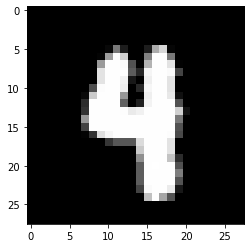

In [3]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [4]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


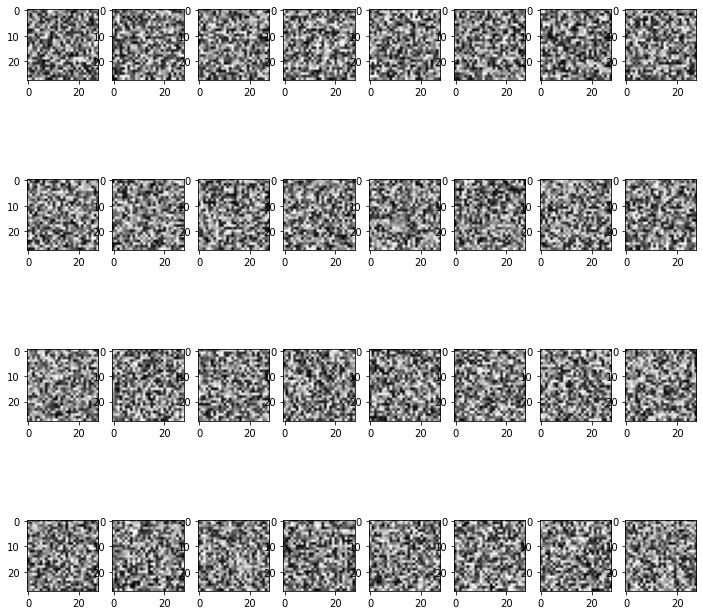

In [5]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [7]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
60000/60000 [==============================] - 3s 49us/step - loss: 1.5773 - accuracy: 0.6102
Epoch 2/2
60000/60000 [==============================] - 1s 21us/step - loss: 0.5989 - accuracy: 0.8540


### Testing

In [9]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 44us/step
Test loss: 0.4364530891895294
Test accuracy: 0.8883000016212463


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


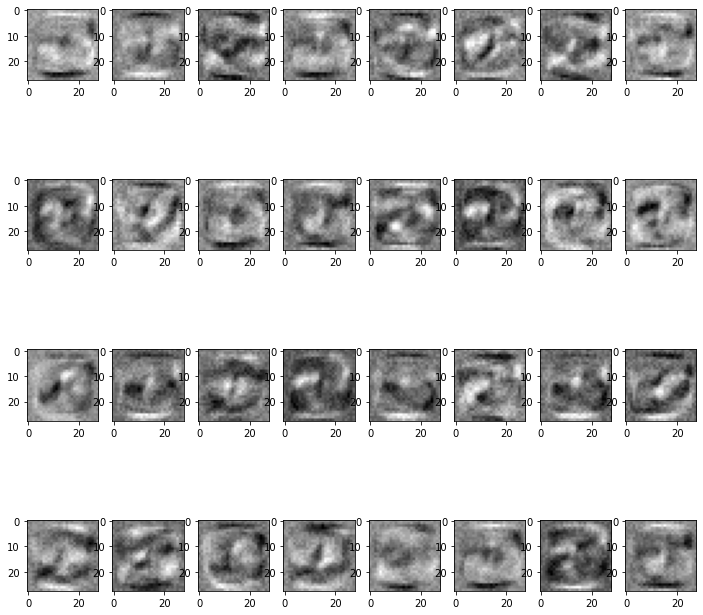

In [10]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [11]:
# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [2.3041807e-01 2.0888911e-05 3.0593930e-03 1.2005421e-02 1.7324615e-02
 6.7640847e-01 5.8063888e-03 2.6892751e-04 3.6620770e-02 1.8067073e-02]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


### Ground truth

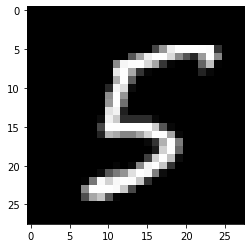

In [12]:
# Write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

### User Input

In [14]:
!wget https://notebooks.azure.com/vipulmishra/projects/labgail/raw/digit.jpg

--2020-05-11 13:45:06--  https://notebooks.azure.com/vipulmishra/projects/labgail/raw/digit.jpg
Resolving notebooks.azure.com (notebooks.azure.com)... 13.65.37.122
Connecting to notebooks.azure.com (notebooks.azure.com)|13.65.37.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20147 (20K) [image/jpeg]
Saving to: ‘digit.jpg’

digit.jpg           100%[===================>]  19.67K  --.-KB/s    in 0.1s    

2020-05-11 13:45:08 (167 KB/s) - ‘digit.jpg’ saved [20147/20147]



(397, 397, 3)


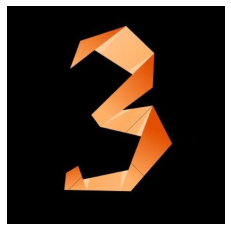

In [15]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_rgb.shape)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

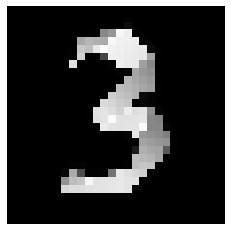

In [16]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [17]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.4380200e-03 1.6170306e-03 8.4073264e-03 9.3596745e-01 1.5348566e-04
 3.2057986e-02 2.0012187e-05 2.1409779e-03 1.6731983e-02 1.4657030e-03]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [18]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [19]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [21]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=6, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
60000/60000 [==============================] - 1s 23us/step - loss: 0.2474 - accuracy: 0.9324
Epoch 2/6
60000/60000 [==============================] - 1s 22us/step - loss: 0.2166 - accuracy: 0.9403
Epoch 3/6
60000/60000 [==============================] - 1s 22us/step - loss: 0.1947 - accuracy: 0.9454
Epoch 4/6
60000/60000 [==============================] - 1s 22us/step - loss: 0.1775 - accuracy: 0.9503
Epoch 5/6
60000/60000 [==============================] - 1s 23us/step - loss: 0.1643 - accuracy: 0.9536
Epoch 6/6
60000/60000 [==============================] - 1s 22us/step - loss: 0.1525 - accuracy: 0.9570
Test loss: 0.17186260205507278
Test accuracy: 0.951200008392334


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [27]:
model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score)
                    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 153s 3ms/step - loss: 0.5004 - accuracy: 0.8709 - val_loss: 0.4101 - val_accuracy: 0.9006
Test loss: 0.41010807306617497
Test accuracy: [0.41010807306617497, 0.900600016117096]


### Relu Activation Function

In [29]:
# Write your code here 
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
                    


# Use the same model design from the above cell 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.6928 - accuracy: 0.7896 - val_loss: 0.4141 - val_accuracy: 0.8791
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3858 - accuracy: 0.8895 - val_loss: 0.3646 - val_accuracy: 0.8944
Epoch 3/10
60000/60000 [==============

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 24us/step - loss: 1.8468 - accuracy: 0.5169 - val_loss: 1.3631 - val_accuracy: 0.6559
Epoch 2/2
60000/60000 [==============================] - 1s 23us/step - loss: 1.0372 - accuracy: 0.7242 - val_loss: 0.7862 - val_accuracy: 0.7933
Test loss: 0.7862372199058533
Test accur

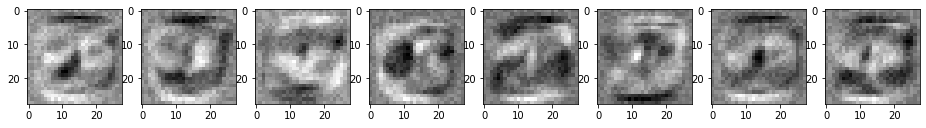

In [30]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [31]:
# Write your code here 
first_layer_size = 32

model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Use the same layer design from the above cell 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 24us/step - loss: 0.4300 - accuracy: 0.8806 - val_loss: 0.2333 - val_accuracy: 0.9300
Epoch 2/2
60000/60000 [==============================] - 1s 23us/step - loss: 0.2034 - accuracy: 0.9404 - val_loss: 0.1800 - val_accuracy: 0.9463
Test loss: 0.18000814736038445
Test ac

### Lower number of Layers. For example 1 hidden layer

In [32]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 8)                

### Lower number of Layers. For example 4 hidden layers

In [33]:
# Write your code here 
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Use the same number of units from the above cell 


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_48 (Dense)             (None, 10)                90        
Total params: 6,586
Trainable params: 6,586
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/ste

### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science

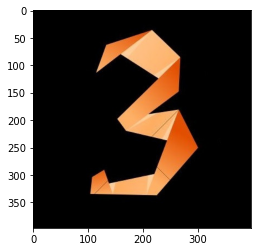

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("digit.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

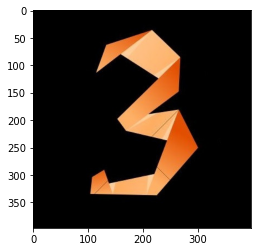

In [35]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('digit.jpg')
img2 = img[:,:,::-1]
plt.imshow(img2)